In [1]:
# General imports
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Your first quantum circuit

In [2]:
qc_output = QuantumCircuit(8) # 8 qubits

In [3]:
qc_output.measure_all() # Adds a measurement to each qubit in circuit, and classical bits as output

In [4]:
qc_output.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

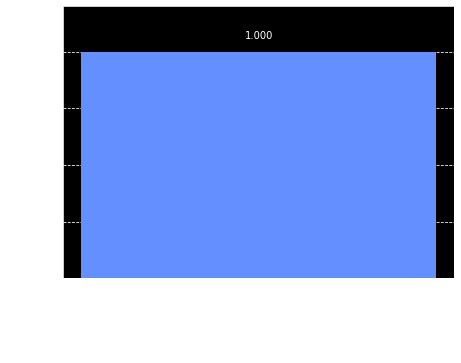

In [5]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

# Example: Creating an Adder Circuit

In [17]:
qc_encode = QuantumCircuit(8) # Define our 8-qubit quantum circuit

In [18]:
qc_encode.x(7) # x == NOT, NOTE: Qiskit numbers the bits in a string from right to left
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [19]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

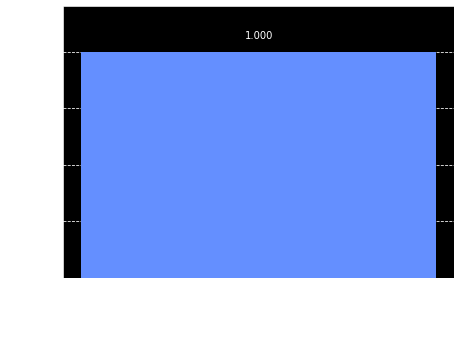

In [21]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode).result()
counts = result.get_counts()

# Qiskit numbers bits from right to left, qubit 7 is the far left bit
plot_histogram(counts)

## Adding with Qiskit

In [23]:
qc_cnot = QuantumCircuit(2) # Controlled-NOT == CNOT ~= XOR
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

### CNOT
Composed of:
* "control" qubit - one with the little dot)
* "target" qubit - with the big circle with a "+" inside it

Operation:
1. Looks at the two input bits to see if they are the same or different
1. Overwrites the "target" qubit with the answer

In [39]:
qc = QuantumCircuit(2,2) # 2 qubits, 2 classical bits as output
qc.x(0) # set initial state
qc.cx(0,1) # control qubit - 0, target qubit 1
qc.measure(0,0) # measure qubit 0, place classical bit 0
qc.measure(1,1) # measure qubit 1, place classical bit 1
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

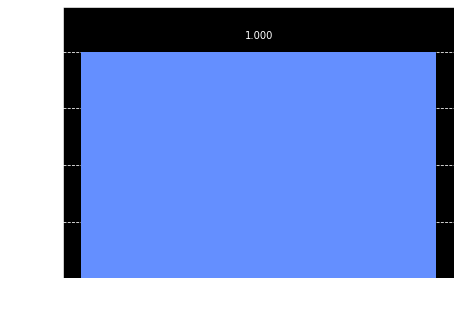

In [40]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()

# Qiskit numbers bits from right to left, qubit 7 is the far left bit
plot_histogram(counts)

### Half Adder

In [46]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier() # Ensures previous section is executed before continuing

# use CNOTs to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

# use Toffoli gate - ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3) # Controlled on 0 and 1, output to 3
qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░            ░       ░       
q_0: ┤ X ├─░───■────────░───■───░───────
     ├───┤ ░   │        ░   │   ░       
q_1: ┤ X ├─░───┼────■───░───■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════╩══╩═
                                   0  1

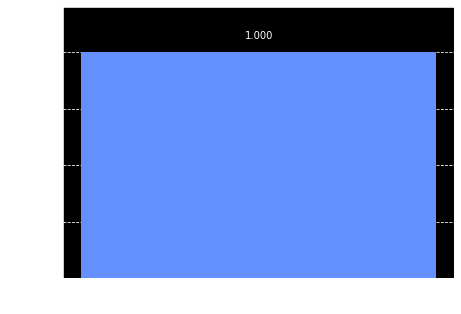

In [47]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)